In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# taking data from files
with open('../data/test.pkl', 'rb') as file1:
    data = pickle.load(file1)
with open('../data/train.pkl', 'rb') as file2:
    data2 = pickle.load(file2)

In [3]:
# shuffling data
np.random.shuffle(data2)
np.random.shuffle(data)

In [4]:
# splitting data into coordinates
x = data2[:,:-1]
y = data2[:,1]
test_x = data[:,:-1]
test_y = data[:,1]

In [5]:
# initialising tables
v_table = np.zeros((10,10))
b_table = np.zeros((10,10))

In [6]:
# initialising arrays
bias = np.zeros((20))
bias2_avg = np.zeros((20))
var_avg = np.zeros((20))
err_avg = np.zeros((20))
tot_avg = np.zeros((20))
irr_avg = np.zeros((20))
xarr = np.zeros((20))

In [7]:
# splitting training set into 10 parts
train_x = np.array((np.array_split(x, 10)))
train_y = np.array((np.array_split(y, 10)))

In [9]:
for degree in range (1,21):

    res1 = np.zeros((10,80))
    res2 = np.zeros((10,80))
    #for training set
    for i in range (0,10):
        poly = PolynomialFeatures(degree=degree, include_bias=False)

        #Transform the polynomial features as required ans training model
        X = poly.fit_transform(train_x[i])
        reg = LinearRegression()
        reg.fit(X, train_y[i])
        X_TEST = poly.fit_transform(test_x)
        y_predict = reg.predict(X_TEST)

        res1[i] = y_predict
        res2[i] = (test_y - y_predict)**2

    #calculate bias
    point_avg=np.mean(res1,axis=0)
    bias2_avg[degree-1]=np.mean((point_avg-test_y)**2)
    bias[degree-1]=np.abs(np.mean((point_avg-test_y)))
    new_avg=np.mean(res2, axis=0)
    #calculate variance
    point_var = np.var(res1,axis=0)
    var_avg[degree-1]=np.mean(point_var)
    #irreducible error calc
    err_avg[degree-1]=np.mean(new_avg) - (bias2_avg[degree-1] + var_avg[degree-1])
    # total error calc
    tot_avg[degree-1]=np.mean(new_avg)

In [10]:
fin_avg = np.mean(err_avg)
#initialising x for graph
use = np.zeros((20))
for degree in range (1,21):
    use[degree-1] = fin_avg
    xarr[degree-1] = degree

In [11]:
# table 1
bias_table=pandas.DataFrame({'Degree':np.array(range(1,21)),'Bias':bias,'Variance': var_avg})
print(bias_table.to_string(index=False))
print('')

 Degree       Bias      Variance
      1 232.565490  21760.356917
      2 229.077945  37140.597002
      3  15.645198  47469.149138
      4   9.103330  58143.810065
      5   8.554731  69406.470349
      6  10.720082  88238.247697
      7   7.677872 111533.146874
      8  12.491992 130503.400833
      9   9.118063 131880.634205
     10   5.214680 150741.316688
     11   8.863481 160335.830357
     12   0.731654 166737.752347
     13  12.422193 202657.491651
     14  13.150980 190155.482776
     15  21.270304 230422.810622
     16  19.664235 243329.647629
     17  29.381615 293182.637364
     18  28.821246 306279.902143
     19  37.987983 371169.461054
     20  38.784316 385938.371441



In [12]:
# table 2
error_table=pandas.DataFrame({'Degree':np.array(range(1,21)), 'Irreducible Error':err_avg[:]})
print(error_table.to_string(index=False))

 Degree  Irreducible Error
      1      -1.164153e-10
      2      -2.328306e-10
      3       0.000000e+00
      4      -4.365575e-11
      5       1.455192e-11
      6       1.455192e-11
      7       2.910383e-11
      8      -2.910383e-11
      9       0.000000e+00
     10      -2.910383e-11
     11      -2.910383e-11
     12       2.910383e-11
     13       0.000000e+00
     14       2.910383e-11
     15       0.000000e+00
     16       5.820766e-11
     17       0.000000e+00
     18       0.000000e+00
     19      -1.164153e-10
     20       1.164153e-10


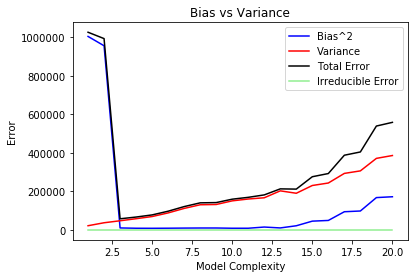

In [13]:
plt.plot(xarr[:], bias2_avg[:], label='Bias^2', color = 'blue')
plt.plot(xarr[:], var_avg[:],label='Variance', color = 'red')
plt.plot(xarr[:], tot_avg[:],label='Total Error', color = 'black')
plt.plot(xarr[:], err_avg[:],label='Irreducible Error', color = 'lightgreen')
plt.ylabel('Error', fontsize='medium')
plt.xlabel('Model Complexity', fontsize='medium')
plt.title("Bias vs Variance")
plt.legend()
plt.show()

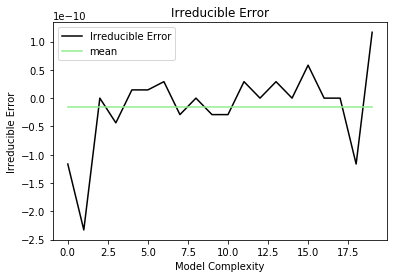

In [14]:
plt.xlabel('Model Complexity', fontsize='medium')
plt.ylabel('Irreducible Error', fontsize='medium')
plt.title("Irreducible Error")
plt.plot(err_avg[:],label='Irreducible Error', color = 'black')
plt.plot(use[:],label='mean', color='lightgreen')
plt.legend()
plt.show()